In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data')

In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis = 1))

In [46]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])

In [47]:
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [48]:
x = df_feat
y = df['TARGET CLASS']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)

In [51]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [52]:
pred = knn.predict(x_test)

In [54]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



[[145  14]
 [ 12 129]]


In [55]:
error = []
for i in  range(1,100):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error')

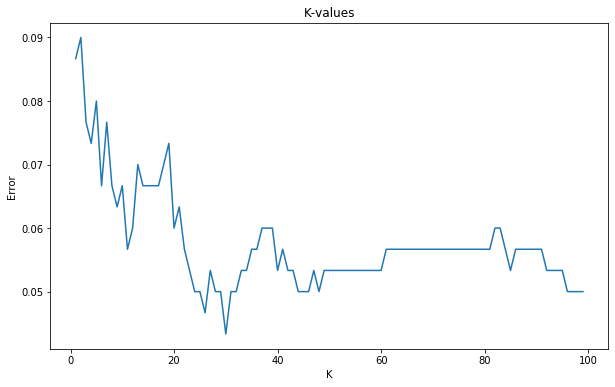

In [57]:
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error)
plt.title('K-values')
plt.xlabel('K')
plt.ylabel('Error')

In [67]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
pred1 = knn.predict(x_test)

In [68]:
print(classification_report(y_test,pred1))
print('\n')
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



[[153   6]
 [  7 134]]
